In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
import plotly
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud

In [50]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [51]:
df = pd.read_csv("/content/NaukriData_Data Science.csv")

In [52]:
df.head()

,Job_Titles,Company_Names,Experience_Required,Package_Details,Locations,Skills,Post_Url,Post_Time
0,Senior Manager - Data Science,AMERICAN EXPRESS,4-8 Yrs,Not disclosed,Gurgaon/Gurugram,Text miningCareer developmentdata scienceFinan...,https://www.naukri.com/job-listings-senior-man...,1 Day Ago
1,Advance Analytical and Data Sciences -Manager,G R Infraprojects,6-10 Yrs,Not disclosed,"Gurgaon/ Gurugram, Haryana",Advanced Statistical AnalysisData Governance a...,https://www.naukri.com/job-listings-advance-an...,7 Days Ago
2,Manager - Digital Product Analytics [Data Scie...,Resy,4-8 Yrs,Not disclosed,Gurgaon/Gurugram,Product managementCareer developmentOperations...,https://www.naukri.com/job-listings-manager-di...,4 Days Ago
3,Data Science Manager,Foreign IT Consulting MNC,1-3 Yrs,Not disclosed,"Mumbai, Hyderabad/Secunderabad, Pune, Gurgaon/...",Change managementSASCodingData miningPythonRst...,NaN,10 Days Ago
4,Data Science Manager,Fortune India 500 Company in FMCG,4-9 Yrs,Not disclosed,Bangalore/Bengaluru,Data analysisdata scienceAnalyticalPredictive ...,NaN,1 Day Ago


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47191 entries, 0 to 47190
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Job_Titles           33633 non-null  object
 1   Company_Names        35823 non-null  object
 2   Experience_Required  35988 non-null  object
 3   Package_Details      38632 non-null  object
 4   Locations            39164 non-null  object
 5   Skills               38029 non-null  object
 6   Post_Url             39841 non-null  object
 7   Post_Time            39881 non-null  object
dtypes: object(8)
memory usage: 2.9+ MB


In [84]:
df.columns

Index(['Job_Titles', 'Company_Names', 'Experience_Required', 'Package_Details',
       'Locations', 'Skills', 'Post_Url', 'Post_Time', 'Clean_Skills',
       'Job_Profile'],
      dtype='object')

In [54]:
df.shape

(47191, 8)

In [55]:
df.isnull().sum()

,0
Job_Titles,13558
Company_Names,11368
Experience_Required,11203
Package_Details,8559
Locations,8027
Skills,9162
Post_Url,7350
Post_Time,7310


In [56]:
df = df.dropna(subset=['Skills'])

In [57]:
df['Job_Titles'] = df['Job_Titles'].fillna('Unknown Role')

In [58]:
df['Company_Names'] = df['Company_Names' ].fillna('Unknown Company')

In [59]:
df['Post_Url'] = df['Post_Url'].fillna("Not Available")


In [60]:
df['Post_Time'] = df['Post_Time'].fillna(df['Post_Time'].mode()[0])


In [61]:
df.isnull().sum()


,0
Job_Titles,0
Company_Names,0
Experience_Required,2041
Package_Details,0
Locations,0
Skills,0
Post_Url,0
Post_Time,0


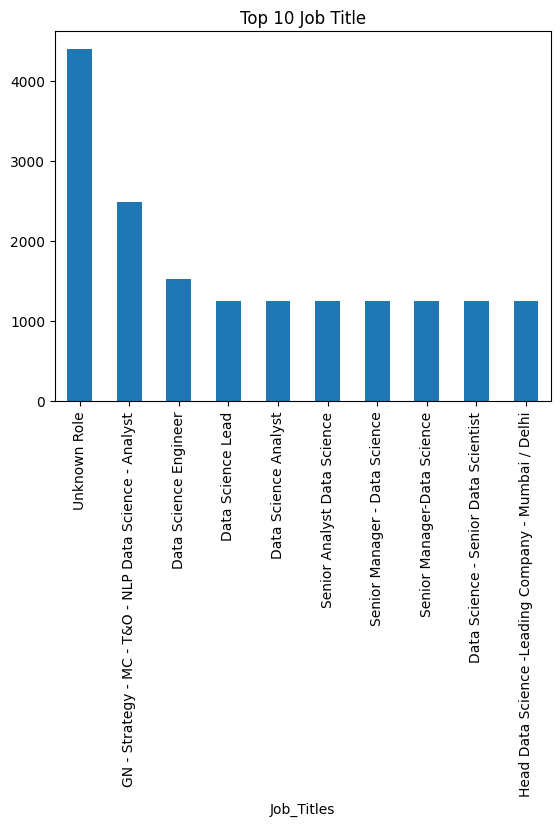

In [62]:
df['Job_Titles'].value_counts().head(10)
plt.figure()
df['Job_Titles'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Job Title')
plt.show()

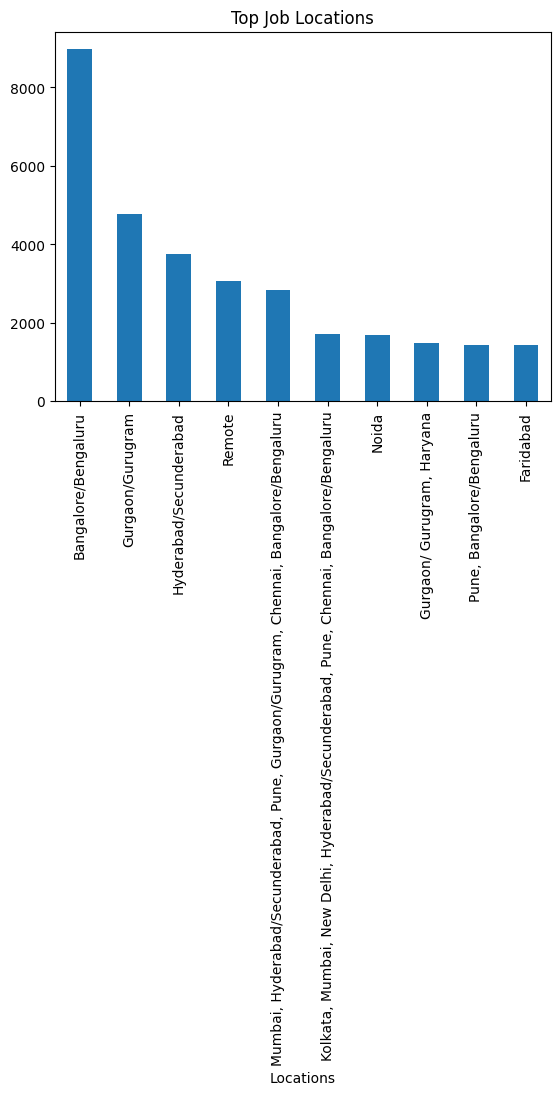

In [63]:
plt.figure()
df['Locations'].value_counts().head(10).plot(kind='bar')
plt.title("Top Job Locations")
plt.show()


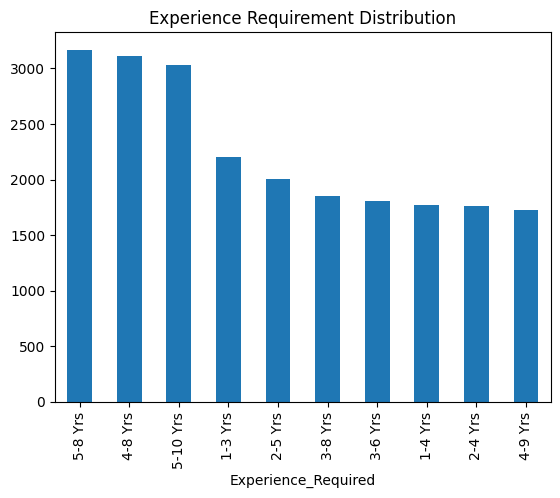

In [64]:
plt.figure()
df['Experience_Required'].value_counts().head(10).plot(kind='bar')
plt.title("Experience Requirement Distribution")
plt.show()


In [65]:
location = df['Locations'].value_counts().nlargest(n=10)
fig = px.bar(y=location.values,
       x=location.index,
       orientation='v',
       color=location.index,
       text=location.values,
       color_discrete_sequence= px.colors.qualitative.Bold)

fig.update_traces(texttemplate='%{text:.2s}',
                  textposition='outside',
                  marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5,
                  opacity=0.7)

fig.update_layout(width=800,
                  showlegend=False,
                  xaxis_title="City",
                  yaxis_title="Count",
                  title="Top 10 cities by job count")
fig.show()

In [68]:

title = df['Job_Titles'].value_counts().nlargest(n=10)
fig = make_subplots(2, 1,
                    subplot_titles=["Top 10 Job Titles",
                                    "Top Job Titles in Mumbai and Bengaluru"])
fig.append_trace(go.Bar(y=title.index,
                        x=title.values,
                        orientation='h',
                        marker=dict(color=title.values, coloraxis="coloraxis"),
                        texttemplate = "%{value:,s}",
                        textposition = "inside",
                        showlegend=False),
                  row=1,
                  col=1)
fig.update_layout(coloraxis_showscale=False)
fig.update_layout(height=800,
                  width=800,
                  yaxis=dict(autorange="reversed"),
                  coloraxis=dict(colorscale='geyser'),
                  coloraxis_colorbar=dict(yanchor="top", y=1, x=0)
)

fig.append_trace(go.Bar(y=df[df['Locations'].isin(['Mumbai'])]['Job_Titles'].value_counts().nlargest(n=10).index,
                        x=df[df['Locations'].isin(['Mumbai'])]['Job_Titles'].value_counts().nlargest(n=10).values,
                        marker_color='#008080',
                        orientation='h',
                        showlegend=True,
                        name="Mumbai"),
                row=2,
                col=1)

fig.append_trace(go.Bar(y=df[df['Locations'].isin(['Bengaluru'])]['Job_Titles'].value_counts().nlargest(n=10).index,
                        x=df[df['Locations'].isin(['Bengaluru'])]['Job_Titles'].value_counts().nlargest(n=10).values,
                        marker_color='#00CED1',
                        orientation='h',
                        showlegend=True,
                        name="Bengaluru"),
                row=2,
                col=1,
                )
fig.update_layout(legend=dict(x=1,
                              y=0.3))
fig.show()

In [74]:
stop_words = set(stopwords.words('english'))


In [75]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z ]', '', text)
    words = text.split()
    words = [w for w in words if w not in stop_words]
    return " ".join(words)


In [78]:
df['Clean_Skills'] = df['Skills'].apply(clean_text)
df[['Skills', 'Clean_Skills']].head()


,Skills,Clean_Skills
0,Text miningCareer developmentdata scienceFinan...,text miningcareer developmentdata sciencefinan...
1,Advanced Statistical AnalysisData Governance a...,advanced statistical analysisdata governance q...
2,Product managementCareer developmentOperations...,product managementcareer developmentoperations...
3,Change managementSASCodingData miningPythonRst...,change managementsascodingdata miningpythonrst...
4,Data analysisdata scienceAnalyticalPredictive ...,data analysisdata scienceanalyticalpredictive ...


In [79]:
df['Job_Profile'] = df['Job_Titles'] + " " + df['Clean_Skills']


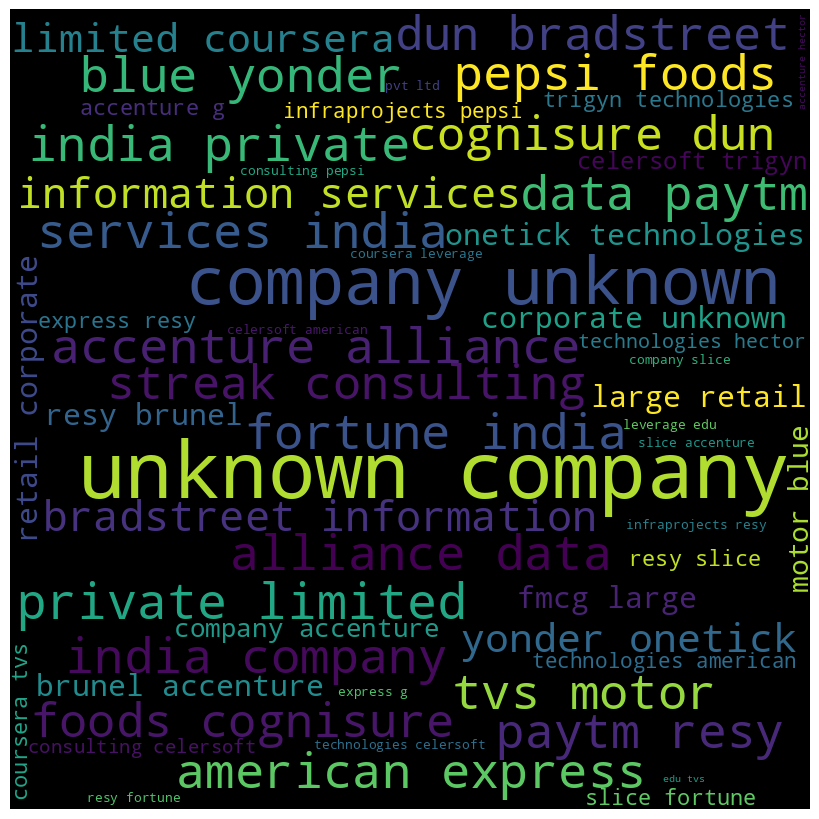

In [80]:
functional_words = df['Company_Names'].dropna().to_list()
tokenizer = RegexpTokenizer(r'\w+')
tokenized_list = [tokenizer.tokenize(i) for i in functional_words]
tokenized_list = [w for l in tokenized_list for w in l]

tokenized_list = [w.lower() for w in tokenized_list]
string = " ".join(w for w in tokenized_list)
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                min_font_size = 10).generate(string)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

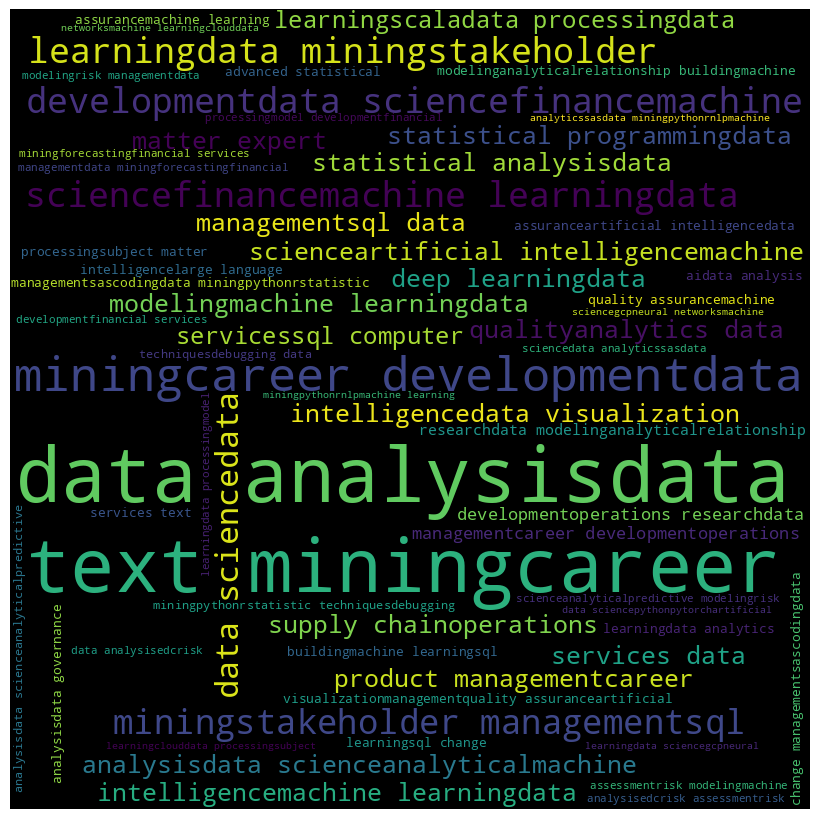

In [81]:
skills = df['Skills'].to_list()
skills = [str(s) for s in skills]
skills = [s.strip().lower()  for i in skills for s in i.split("|")]
string = " ".join(w for w in skills)
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                min_font_size = 10).generate(string)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [86]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)

job_vectors = tfidf.fit_transform(df['Job_Profile'])


In [87]:
job_vectors.shape


(38029, 5000)

In [88]:
user_skills = "python machine learning sql data analysis"


In [89]:
user_clean = clean_text(user_skills)


In [90]:
user_vector = tfidf.transform([user_clean])


In [91]:
user_vector.shape


(1, 5000)

In [92]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_scores = cosine_similarity(user_vector, job_vectors)


In [93]:
similarity_scores.shape


(1, 38029)

In [94]:
df['Score'] = similarity_scores[0]


In [95]:
df[['Job_Titles', 'Score']].head()


,Job_Titles,Score
0,Senior Manager - Data Science,0.012474
1,Advance Analytical and Data Sciences -Manager,0.134963
2,Manager - Digital Product Analytics [Data Scie...,0.008773
3,Data Science Manager,0.013627
4,Data Science Manager,0.023900


In [96]:
df['Score'].min(), df['Score'].max()


(0.0, 0.6830515661724199)

In [97]:
df.sort_values(by='Score', ascending=False).head(5)


,Job_Titles,Company_Names,Experience_Required,Package_Details,Locations,Skills,Post_Url,Post_Time,Clean_Skills,Job_Profile,Score
1613,Senior Engineer Python,Franklin Templeton,3-4 Yrs,Not disclosed,"Mumbai, Mumbai Suburban",Machine Learning AlgorithmsPythonHiringAlgorit...,https://www.naukri.com/job-listings-staff-data...,30+ Days Ago,machine learning algorithmspythonhiringalgorit...,Senior Engineer Python machine learning algori...,0.683052
1104,Machine Learning Engineer,Manoranjan Grah Limited,4-5 Yrs,Not disclosed,Gurgaon/Gurugram,NLPEcommerceNatural language processingSQLPyth...,https://www.naukri.com/job-listings-data-scien...,30+ Days Ago,nlpecommercenatural language processingsqlpyth...,Machine Learning Engineer nlpecommercenatural ...,0.534331
956,Machine Learning,Deutsche Bank,6-11 Yrs,Not disclosed,Kolkata,Statistical modelingTranslationUsagedata scien...,https://www.naukri.com/job-listings-senior-ana...,4 Days Ago,statistical modelingtranslationusagedata scien...,Machine Learning statistical modelingtranslati...,0.496458
4871,Machine Learning Engineer,Red Symbol Technologies,4-7 Yrs,Not disclosed,Gurgaon,Data migrationCodingDatabase designPostgresqlM...,https://www.naukri.com/job-listings-data-engin...,30+ Days Ago,data migrationcodingdatabase designpostgresqlm...,Machine Learning Engineer data migrationcoding...,0.495717
3172,Machine Learning Engineer,Bridgera,8-15 Yrs,3.5-5 Lacs PA,Gurgaon/Gurugram,PysparkscalaData BricksazureDataAzure Data Fac...,https://www.naukri.com/job-listings-ai-researc...,21 Days Ago,pysparkscaladata bricksazuredataazure data fac...,Machine Learning Engineer pysparkscaladata bri...,0.495717


In [98]:
df.sort_values(by='Score', ascending=True).head(5)


,Job_Titles,Company_Names,Experience_Required,Package_Details,Locations,Skills,Post_Url,Post_Time,Clean_Skills,Job_Profile,Score
4605,Commodity News Analyst,Lyric Labs India Private Limited,5-8 Yrs,6-14 Lacs PA,Remote,IT servicesSANCloud computingPDFdata domainSOC...,https://www.naukri.com/job-listings-sap-plant-...,13 Days Ago,servicessancloud computingpdfdata domainsocsmsaws,Commodity News Analyst servicessancloud comput...,0.0
4621,Business Analyst,Technocrats Horizons,5-10 Yrs,Not disclosed,Mohali,HibernateAutomationRDBMSMySQLJavascriptData st...,https://www.naukri.com/job-listings-financial-...,4 Days Ago,hibernateautomationrdbmsmysqljavascriptdata st...,Business Analyst hibernateautomationrdbmsmysql...,0.0
4620,Business Analyst,CVM Solutions,8-12 Yrs,Not disclosed,Pune,UnixLinuxData managementCodingApacheAdobeAnaly...,https://www.naukri.com/job-listings-it-busines...,30 Days Ago,unixlinuxdata managementcodingapacheadobeanaly...,Business Analyst unixlinuxdata managementcodin...,0.0
4619,Business Analyst,Emipro Technologies,6-10 Yrs,Not disclosed,Gurgaon/Gurugram,Analytical skillsSQL queriesdata manipulationW...,https://www.naukri.com/job-listings-visual-ana...,30 Days Ago,analytical skillssql queriesdata manipulationw...,Business Analyst analytical skillssql queriesd...,0.0
4618,Business Analyst,Abserve Tech,3-5 Yrs,Not disclosed,Gurgaon/Gurugram,Automationdata engineer iiData modelingDatabas...,https://www.naukri.com/job-listings-team-lead-...,30 Days Ago,automationdata engineer iidata modelingdatabas...,Business Analyst automationdata engineer iidat...,0.0


In [99]:
recommended_jobs = (
    df[['Job_Titles', 'Company_Names', 'Experience_Required',
        'Package_Details', 'Locations', 'Score']]
    .sort_values(by='Score', ascending=False)
    .head(10)
)

recommended_jobs


,Job_Titles,Company_Names,Experience_Required,Package_Details,Locations,Score
1613,Senior Engineer Python,Franklin Templeton,3-4 Yrs,Not disclosed,"Mumbai, Mumbai Suburban",0.683052
1104,Machine Learning Engineer,Manoranjan Grah Limited,4-5 Yrs,Not disclosed,Gurgaon/Gurugram,0.534331
956,Machine Learning,Deutsche Bank,6-11 Yrs,Not disclosed,Kolkata,0.496458
4871,Machine Learning Engineer,Red Symbol Technologies,4-7 Yrs,Not disclosed,Gurgaon,0.495717
3172,Machine Learning Engineer,Bridgera,8-15 Yrs,3.5-5 Lacs PA,Gurgaon/Gurugram,0.495717
3185,Machine Learning Engineer,Digichefs,2-6 Yrs,Not disclosed,"Pune, Maharashtra, Ahmedabad, Gujarat, Mumbai ...",0.485872
4895,Machine Learning Engineer,ThoughtFocus,3-6 Yrs,Not disclosed,"Mumbai, Navi Mumbai, Hyderabad/Secunderabad, C...",0.485872
4896,Machine Learning Engineer,Athena Consultancy Services,5-8 Yrs,Not disclosed,Mumbai,0.485872
1475,Machine Learning Engineer,Delta Web Services,5-10 Yrs,Not disclosed,"Hybrid - Gurgaon/ Gurugram, Haryana, Bangalore...",0.485872
4308,Business Analyst (IT),Birlamedisoft,1-6 Yrs,Not disclosed,Noida,0.482071


In [100]:
for i, row in recommended_jobs.iterrows():
    print(f"""
Job Title   : {row['Job_Titles']}
Company     : {row['Company_Names']}
Location    : {row['Locations']}
Experience  : {row['Experience_Required']}
Package     : {row['Package_Details']}
Match Score : {round(row['Score']*100, 2)} %
-------------------------------------
""")



Job Title   : Senior Engineer Python
Company     : Franklin Templeton
Location    : Mumbai, Mumbai Suburban
Experience  : 3-4 Yrs
Package     : Not disclosed
Match Score : 68.31 %
-------------------------------------


Job Title   : Machine Learning Engineer
Company     : Manoranjan Grah Limited
Location    : Gurgaon/Gurugram
Experience  : 4-5 Yrs
Package     : Not disclosed
Match Score : 53.43 %
-------------------------------------


Job Title   : Machine Learning
Company     : Deutsche Bank
Location    : Kolkata
Experience  : 6-11 Yrs
Package     : Not disclosed
Match Score : 49.65 %
-------------------------------------


Job Title   : Machine Learning Engineer
Company     : Red Symbol Technologies
Location    : Gurgaon
Experience  : 4-7 Yrs
Package     : Not disclosed
Match Score : 49.57 %
-------------------------------------


Job Title   : Machine Learning Engineer
Company     : Bridgera
Location    : Gurgaon/Gurugram
Experience  : 8-15 Yrs
Package     : 3.5-5 Lacs PA
Match S